In [1]:
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.io import wavfile
import torch
# import torchaudio

In [2]:
########################################################################################
# api guide: https://spaceweather.rra.go.kr/notification/api/guide
# data description: https://spaceweather.rra.go.kr/observation/ground/magnetism/icheon
########################################################################################


RequestJeju = requests.get('http://spaceweather.rra.go.kr/api/magnetism/jeju')
RequestIcheon = requests.get('http://spaceweather.rra.go.kr/api/magnetism/icheon')
jsonJeju = RequestJeju.json()
jsonIcheon = RequestIcheon.json()

In [3]:
#####################################################################
# Unit of data
#####################################################################
# Time: Universal Time
# Raw_Hx: nano Tesla
# Raw_Hy: nano Tesla
# Raw_Hz: nano Tesla
# Raw_F: nano Tesla
# L1_Dcom: nano Tesla
# L1_Hcom: nano Tesla
#####################################################################

df_Jeju = pd.json_normalize(jsonJeju)
df_Jeju = df_Jeju["Data"].tolist()
df_Jeju = pd.DataFrame(df_Jeju[0])
print(df_Jeju.head(10))

df_Icheon = pd.json_normalize(jsonIcheon)
df_Icheon = df_Icheon["Data"].tolist()
df_Icheon = pd.DataFrame(df_Icheon[0])
print(df_Icheon.head(10))

start_time = df_Jeju["Time"][0]
print(start_time)

      L1_Dcom            Time   L1_lastUpdate    Raw_Hx  Raw_Hy  \
0 -705.839699  20220519084837  20220519174843  33168.10 -705.68   
1 -705.839699  20220519084836  20220519174843  33168.10 -705.68   
2 -705.839699  20220519084835  20220519174843  33168.11 -705.68   
3 -705.849706  20220519084834  20220519174843  33168.10 -705.69   
4 -705.849706  20220519084833  20220519174843  33168.11 -705.69   
5 -705.859713  20220519084832  20220519174843  33168.11 -705.70   
6 -705.859713  20220519084831  20220519174843  33168.12 -705.70   
7 -705.859713  20220519084830  20220519174843  33168.11 -705.70   
8 -705.869719  20220519084829  20220519174843  33168.13 -705.71   
9 -705.889733  20220519084828  20220519174843  33168.12 -705.73   

   Raw_lastUpdate    Raw_Hz       L1_Hcom     Raw_F  
0  20220519084837  31984.43  33175.606127  48901.72  
1  20220519084836  31984.42  33175.606127  48901.72  
2  20220519084835  31984.42  33175.616124  48901.72  
3  20220519084834  31984.41  33175.606339  489

In [4]:
# Standarize my data

std = StandardScaler()

scaled_jeju_x = np.concatenate(std.fit_transform(df_Jeju[["Raw_Hx"]]))
scaled_jeju_y = np.concatenate(std.fit_transform(df_Jeju[["Raw_Hy"]]))
scaled_jeju_z = np.concatenate(std.fit_transform(df_Jeju[["Raw_Hz"]]))
scaled_jeju_f = np.concatenate(std.fit_transform(df_Jeju[["Raw_F"]]))
scaled_jeju_h = np.concatenate(std.fit_transform(df_Jeju[["L1_Hcom"]]))
scaled_jeju_d = np.concatenate(std.fit_transform(df_Jeju[["L1_Dcom"]]))

# print(scaled_jeju_x)

scaled_jeju_df = pd.DataFrame({'scaled_jeju_x': scaled_jeju_x,
                               'scaled_jeju_y': scaled_jeju_y,
                               'scaled_jeju_z': scaled_jeju_z,
                               'scaled_jeju_f': scaled_jeju_f,
                               'scaled_jeju_h': scaled_jeju_h,
                               'scaled_jeju_d': scaled_jeju_d})

scaled_jeju_df.to_csv('../mag_data/scaled_jeju%s.csv'%str(start_time), index = False)
scaled_icheon_x = std.fit_transform(df_Icheon[["Raw_Hx"]])
scaled_icheon_y = std.fit_transform(df_Icheon[["Raw_Hy"]])
scaled_icheon_z = std.fit_transform(df_Icheon[["Raw_Hz"]])
scaled_icheon_f = std.fit_transform(df_Icheon[["Raw_F"]])
scaled_icheon_h = std.fit_transform(df_Icheon[["L1_Hcom"]])
scaled_icheon_d = std.fit_transform(df_Icheon[["L1_Dcom"]])




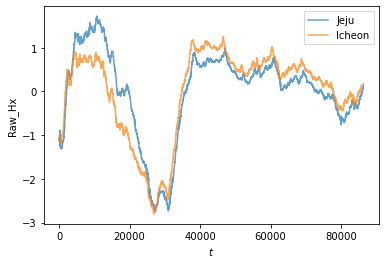

In [5]:
# X component of the observed earth magnetism
plt.plot(scaled_jeju_x, label = "Jeju", alpha = 0.7)
plt.plot(scaled_icheon_x, label = "Icheon", alpha = 0.7)
plt.xlabel(r'$t$')
plt.ylabel("Raw_Hx")
plt.legend()
plt.show()

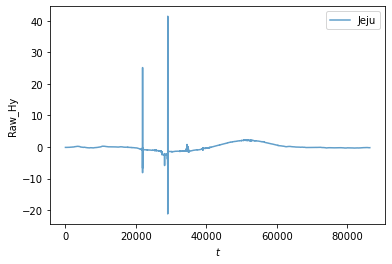

In [14]:
# Y component of the observed earth magnetism
plt.plot(scaled_jeju_y, label = "Jeju", alpha = 0.7)
# plt.plot(scaled_icheon_y, label = "Icheon", alpha = 0.7)
plt.xlabel(r'$t$')
plt.ylabel("Raw_Hy")
plt.legend()
plt.show()

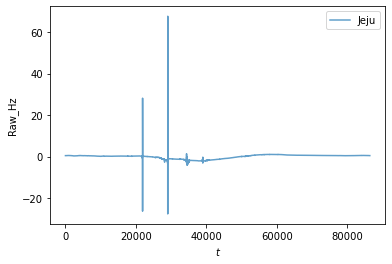

In [15]:
# Z component of the observed earth magnetism
plt.plot(scaled_jeju_z, label = "Jeju", alpha = 0.7)
# plt.plot(scaled_icheon_z, label = "Icheon", alpha = 0.7)
plt.xlabel(r'$t$')
plt.ylabel("Raw_Hz")
plt.legend()
plt.show()

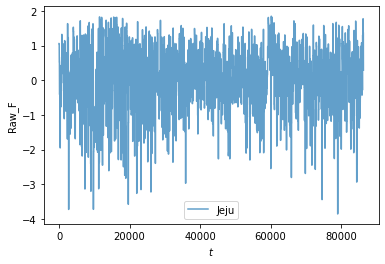

In [8]:
# Magnitude of the observed earth magnetism

plt.plot(scaled_jeju_f, label = "Jeju", alpha = 0.7)
# plt.plot(scaled_icheon_f, label = "Icheon", alpha = 0.7)
plt.xlabel(r'$t$')
plt.ylabel("Raw_F")
# plt.xlim(38000, 40000)
# plt.xscale("log")
plt.legend()
plt.show()

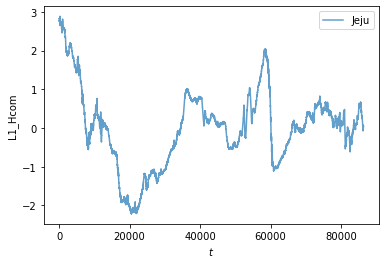

In [9]:
# calculated D component of the earth magnetism

plt.plot(scaled_jeju_h, label = "Jeju", alpha = 0.7)
# plt.plot(scaled_icheon_h, label = "Icheon", alpha = 0.7)
plt.xlabel(r'$t$')
plt.ylabel("L1_Hcom")
plt.legend()
plt.show()

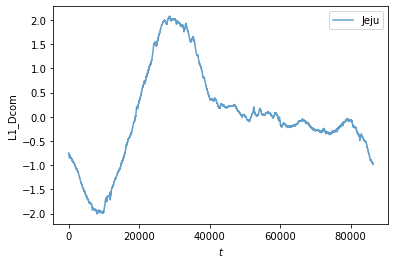

In [10]:
# calculated D component of the earth magnetism

plt.plot(scaled_jeju_d, label = "Jeju", alpha = 0.7)
# plt.plot(scaled_icheon_d, label = "Icheon", alpha = 0.7)
plt.xlabel(r'$t$')
plt.ylabel("L1_Dcom")
# plt.xlim(22250, 22256)
plt.legend()
plt.show()

In [52]:
def adjust_amplitude(data, amplitude = 4096):
    w = amplitude / np.max(abs(data))
    rescaled_data = [w * d for d in data]
    # rescaled_data = np.concatenate(rescaled_data, axis=0)
    rescaled_data = np.array(rescaled_data)
    return rescaled_data

def modify_signal(data, scale, amplitude = 4096):
    w = amplitude / np.max(abs(data))
    rescaled_data = [w * d for d in data]
    ext_data = []
    for i in range(scale):
        ext_data.append(rescaled_data)
    ext_data = np.concatenate(ext_data, axis = 0)
    return ext_data

In [55]:
re_jeju_x = adjust_amplitude(scaled_jeju_x)
re_jeju_y = adjust_amplitude(scaled_jeju_y)
re_jeju_z = adjust_amplitude(scaled_jeju_z)
re_jeju_f = adjust_amplitude(scaled_jeju_f)
re_jeju_h = adjust_amplitude(scaled_jeju_h)
re_jeju_d = adjust_amplitude(scaled_jeju_d)

wavfile.write('jeju_x.wav', rate=44100, data=re_jeju_x.astype(np.int16))
wavfile.write('jeju_y.wav', rate=44100, data=re_jeju_y.astype(np.int16))
wavfile.write('jeju_z.wav', rate=44100, data=re_jeju_z.astype(np.int16))
wavfile.write('jeju_f.wav', rate=44100, data=re_jeju_f.astype(np.int16))
wavfile.write('jeju_h.wav', rate=44100, data=re_jeju_h.astype(np.int16))
wavfile.write('jeju_d.wav', rate=44100, data=re_jeju_d.astype(np.int16))

wavfile.write('jeju_x2.wav', rate=22050, data=re_jeju_x.astype(np.int16))
wavfile.write('jeju_y2.wav', rate=22050, data=re_jeju_y.astype(np.int16))
wavfile.write('jeju_z2.wav', rate=22050, data=re_jeju_z.astype(np.int16))
wavfile.write('jeju_f2.wav', rate=22050, data=re_jeju_f.astype(np.int16))
wavfile.write('jeju_h2.wav', rate=22050, data=re_jeju_h.astype(np.int16))
wavfile.write('jeju_d2.wav', rate=22050, data=re_jeju_d.astype(np.int16))

In [ ]:
test = modify_signal(re_jeju_x, 8)
new = []
repeat = 4

for sig in test:
    for i in range(repeat):
        new.append(sig)

new = np.array(new)

In [ ]:
wavfile.write('test.wav', rate=22050, data=test.astype(np.int16))
wavfile.write('new.wav', rate=44100, data=new.astype(np.int16))

In [54]:
re_jeju_x

array([-2458.57416657, -2458.57416657, -2461.99259211, ...,
        1144.44635207,  1135.90028822,  1141.02792653])

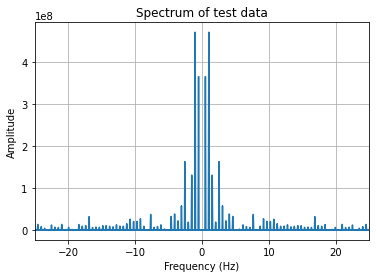

In [234]:
# Load data from wav file
sample_rate, test = wavfile.read('test.wav')

#FFT
t = np.arange(test.shape[0])
freq = np.fft.fftfreq(t.shape[-1])*sample_rate
sp = np.fft.fft(test) 

# Plot spectrum
plt.plot(freq, abs(sp.real))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Spectrum of test data')
plt.xlim(-25, 25)
plt.grid()

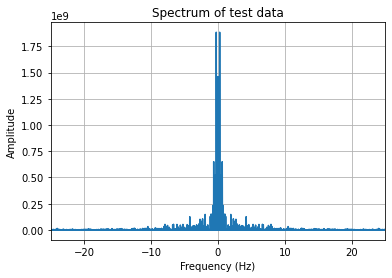

In [233]:
# Load data from wav file
sample_rate, test = wavfile.read('new.wav')

#FFT
t = np.arange(test.shape[0])
freq = np.fft.fftfreq(t.shape[-1])*sample_rate
sp = np.fft.fft(test) 

# Plot spectrum
plt.plot(freq, abs(sp.real))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Spectrum of test data')
plt.xlim(-25, 25)
plt.grid()